# MUSHROOM DATASET ANALYSIS

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [43]:
df = pd.read_csv('C:\\Users\\HP LAPTOP\\Downloads\\agaricus-lepiota.data',header=None)

In [44]:
print(df.shape)
df.head()

(8124, 23)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [45]:
column_labels = [
    'class', 'cap shape', 'cap surface', 'cap color', 'bruised', 'odor',
    'gill attachment', 'gill spacing', 'gill size', 'gill color', 
    'stalk shape', 'stalk root', 'stalk surface above ring',
    'stalk surface below ring', 'stalk color above ring',
    'stalk color below ring', 'veil type', 'veil color', 'ring number',
    'ring type', 'spore print color', 'population', 'habitat'
]

df.columns = column_labels

In [46]:
df.head()

,class,cap shape,cap surface,cap color,bruised,odor,gill attachment,gill spacing,gill size,gill color,...,stalk surface below ring,stalk color above ring,stalk color below ring,veil type,veil color,ring number,ring type,spore print color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [47]:
# Removing Null Values

In [48]:
df['stalk root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk root, dtype: int64

In [49]:
df = df[df['stalk root'] != '?']

class                       0
cap shape                   0
cap surface                 0
cap color                   0
bruised                     0
odor                        0
gill attachment             0
gill spacing                0
gill size                   0
gill color                  0
stalk shape                 0
stalk root                  0
stalk surface above ring    0
stalk surface below ring    0
stalk color above ring      0
stalk color below ring      0
veil type                   0
veil color                  0
ring number                 0
ring type                   0
spore print color           0
population                  0
habitat                     0
dtype: int64


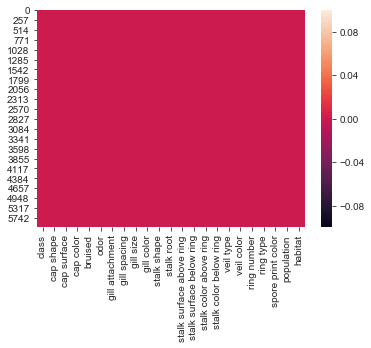

In [50]:
#Removing Null Values:
print(df.isnull().sum())
sns.heatmap(df.isnull())

In [51]:
df['class'].value_counts()

e    3488
p    2156
Name: class, dtype: int64

In [52]:
# Data Wrangling:

In [53]:
from sklearn.preprocessing import LabelEncoder
cols = [
    'class', 'cap shape', 'cap surface', 'cap color', 'bruised', 'odor',
    'gill attachment', 'gill spacing', 'gill size', 'gill color', 
    'stalk shape', 'stalk root', 'stalk surface above ring',
    'stalk surface below ring', 'stalk color above ring',
    'stalk color below ring', 'veil type', 'veil color', 'ring number',
    'ring type', 'spore print color', 'population', 'habitat'
]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [54]:
df.head()

,class,cap shape,cap surface,cap color,bruised,odor,gill attachment,gill spacing,gill size,gill color,...,stalk surface below ring,stalk color above ring,stalk color below ring,veil type,veil color,ring number,ring type,spore print color,population,habitat
0,1,5,2,4,1,6,1,0,1,2,...,2,5,5,0,0,1,3,1,3,5
1,0,5,2,7,1,0,1,0,0,2,...,2,5,5,0,0,1,3,2,2,1
2,0,0,2,6,1,3,1,0,0,3,...,2,5,5,0,0,1,3,2,2,3
3,1,5,3,6,1,6,1,0,1,3,...,2,5,5,0,0,1,3,1,3,5
4,0,5,2,3,0,5,1,1,0,2,...,2,5,5,0,0,1,0,2,0,1


In [55]:
#### Performing EDA Analysis

In [56]:
df['class'].value_counts()

0    3488
1    2156
Name: class, dtype: int64

out of 8124 43.0 mushrooms is edible and 27.0 is poisonous


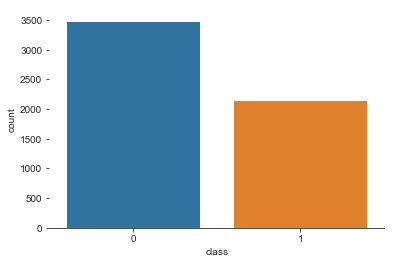

In [57]:
sns.set_style('ticks')
sns.countplot(df['class'])
sns.despine(left=True)
edible = round((df['class'].value_counts().values[0]/8124)*100)
poisonous = round((df['class'].value_counts().values[1]/8124)*100)
print("out of 8124 {} mushrooms is edible and {} is poisonous".format(edible,poisonous))

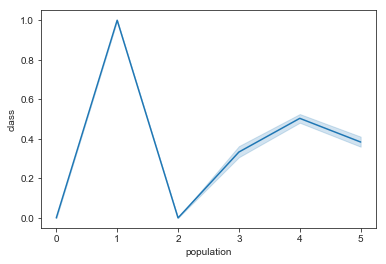

In [58]:
sns.lineplot(x=df['population'],y=df['class'],data=df)
plt.show()

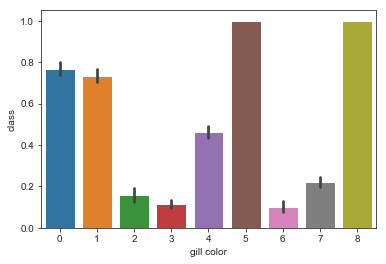

In [59]:
sns.barplot(x=df['gill color'],y=df['class'],data=df)
plt.show()

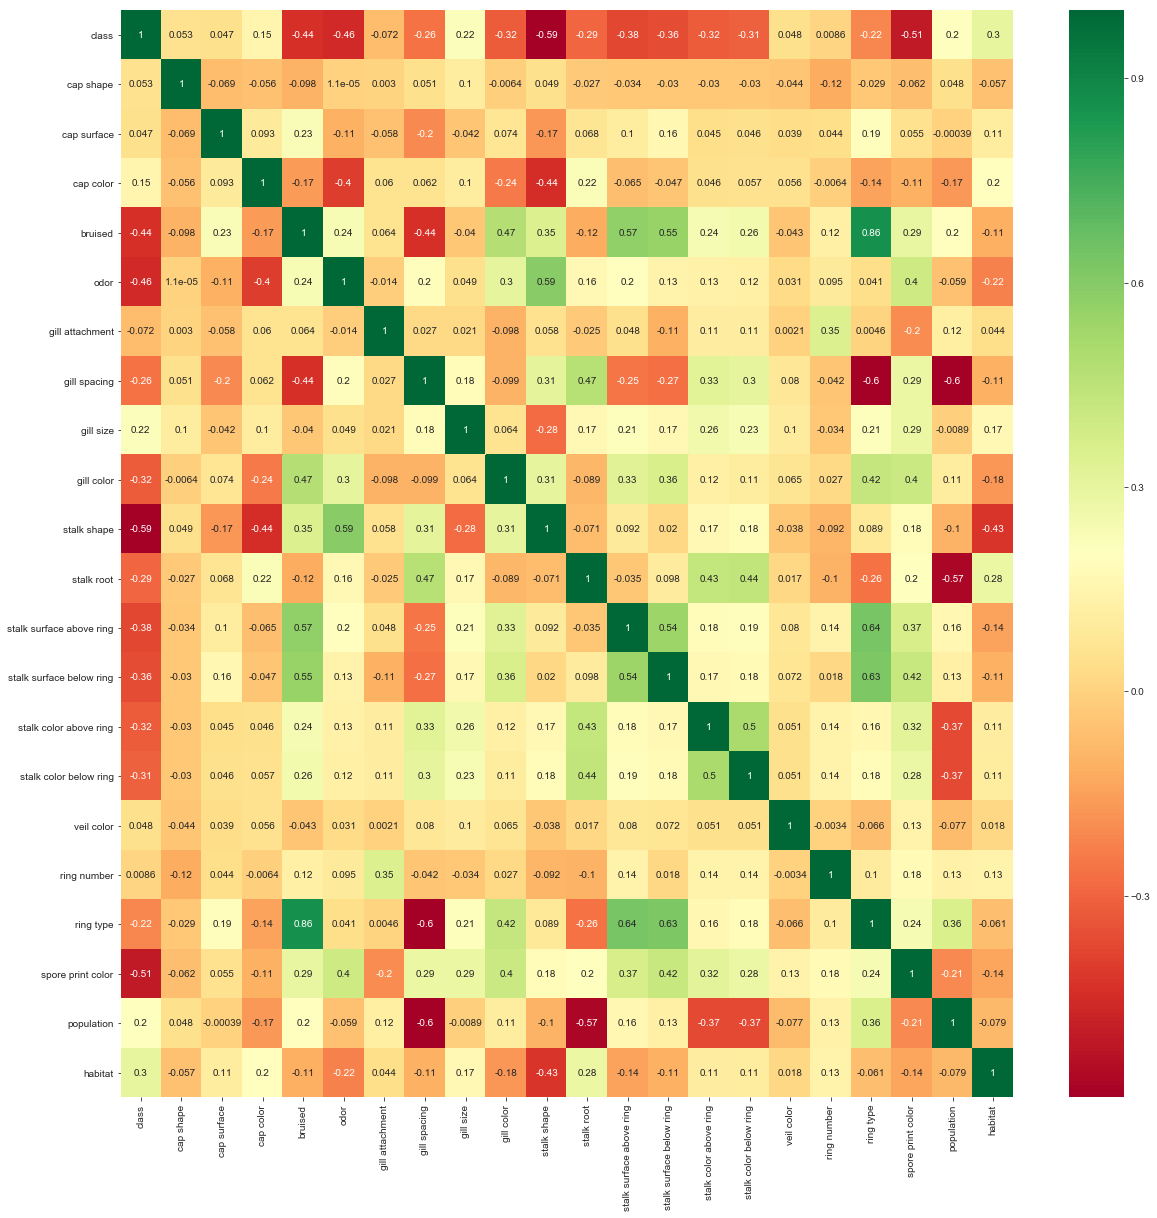

In [60]:
df.drop('veil type',axis=1,inplace=True)
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [61]:
df.corr().head()

,class,cap shape,cap surface,cap color,bruised,odor,gill attachment,gill spacing,gill size,gill color,...,stalk surface above ring,stalk surface below ring,stalk color above ring,stalk color below ring,veil color,ring number,ring type,spore print color,population,habitat
class,1.000000,0.053155,0.046859,0.150741,-0.435562,-0.455566,-0.071945,-0.264160,0.215289,-0.318339,...,-0.375910,-0.363604,-0.317244,-0.308613,0.047921,0.008615,-0.215200,-0.507034,0.203882,0.297412
cap shape,0.053155,1.000000,-0.068688,-0.056421,-0.097782,0.000011,0.002963,0.051432,0.103443,-0.006431,...,-0.033516,-0.029780,-0.030272,-0.029700,-0.043596,-0.118191,-0.029420,-0.062007,0.048283,-0.057451
cap surface,0.046859,-0.068688,1.000000,0.093355,0.228590,-0.108697,-0.058104,-0.204448,-0.042356,0.073668,...,0.103073,0.162293,0.045018,0.046099,0.038702,0.044289,0.190188,0.054747,-0.000390,0.106918
cap color,0.150741,-0.056421,0.093355,1.000000,-0.165794,-0.400652,0.059693,0.062189,0.102676,-0.242099,...,-0.064736,-0.047284,0.046088,0.056865,0.055906,-0.006358,-0.142629,-0.105214,-0.171096,0.196001
bruised,-0.435562,-0.097782,0.228590,-0.165794,1.000000,0.235055,0.064351,-0.439183,-0.040178,0.470309,...,0.572114,0.552523,0.243577,0.256369,-0.042863,0.122162,0.861993,0.292185,0.196296,-0.114367


In [62]:
#Selecting Input and output data

In [63]:
X = df.drop('class',axis=1)
y = df['class']
print(X.shape)
print(y.shape)

(5644, 21)
(5644,)


In [64]:
#Doing Training Testing Split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)    #stratify=y

In [66]:
print(X_train.shape)
print(y_train.shape)

(4515, 21)
(4515,)


In [67]:
print(X_test.shape)
print(y_test.shape)

(1129, 21)
(1129,)


In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

accuracy_score: 0.978742249778565
[[697   8]
 [ 16 408]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       705
           1       0.98      0.96      0.97       424

   micro avg       0.98      0.98      0.98      1129
   macro avg       0.98      0.98      0.98      1129
weighted avg       0.98      0.98      0.98      1129



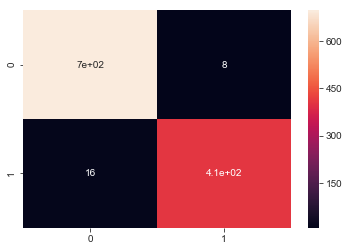

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

# Using nested cross-validation to evaluate performance

In [70]:
param_grid = [{'C': np.logspace(-3, 3, 10)}]   ####Performing Hyperparametre Tuning

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    scoring='f1',
    n_jobs=-1)

In [71]:
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'C': 46.41588833612773}

In [72]:
model = LogisticRegression(C=46.41588833612773)
model.fit(X_train,y_train)
y_predict= model.predict(X_test)

In [73]:
scores = cross_val_score(
    model,X,y,cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0),scoring='f1',n_jobs=-1)

In [74]:
scores.mean()

0.9970955744846824

# AUC and ROC Curve

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [76]:
y_pred_prob = model.predict_proba(X_test)[:,1]

In [77]:
y_pred_prob

array([2.00611265e-84, 9.99999929e-01, 2.75497258e-02, ...,
       4.35885608e-04, 9.99814346e-01, 2.13196423e-04])

In [78]:
tpr,fpr,thresholds = roc_curve(y_test,y_pred_prob)

In [79]:
tpr

array([0., 0., 0., 1.])

In [80]:
fpr

array([0.        , 0.11792453, 1.        , 1.        ])

In [81]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 7.52924421e-01, 1.29094461e-88])

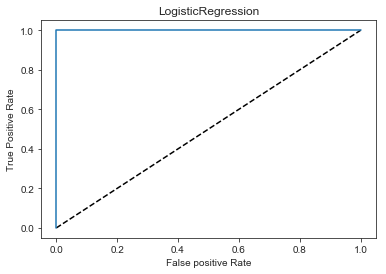

In [82]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label ='LogisticRegression')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression')
plt.show()